In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from IPython.display import Image
import scipy.io as spio
import scipy.signal as signal

# Projeto 2 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Gustavo Almeida Valentim
## Matrícula: 202014468

# Questão 1

Um sistema de aquisição de dados de eletrocardiograma foi ligado de forma equivocada perto demais da rede elétrica. Assim, a interferência da rede elétrica (a 60 Hz) aparece de forma marcante no sinal adquirido. O seu objetivo é projetar um filtro digital para eliminar totalmente o ruído em 60Hz. A frequência de amostragem do sistema é: 

$$ f_a = 500~Hz $$ 

Siga as questões abaixo.

## Questão 1a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

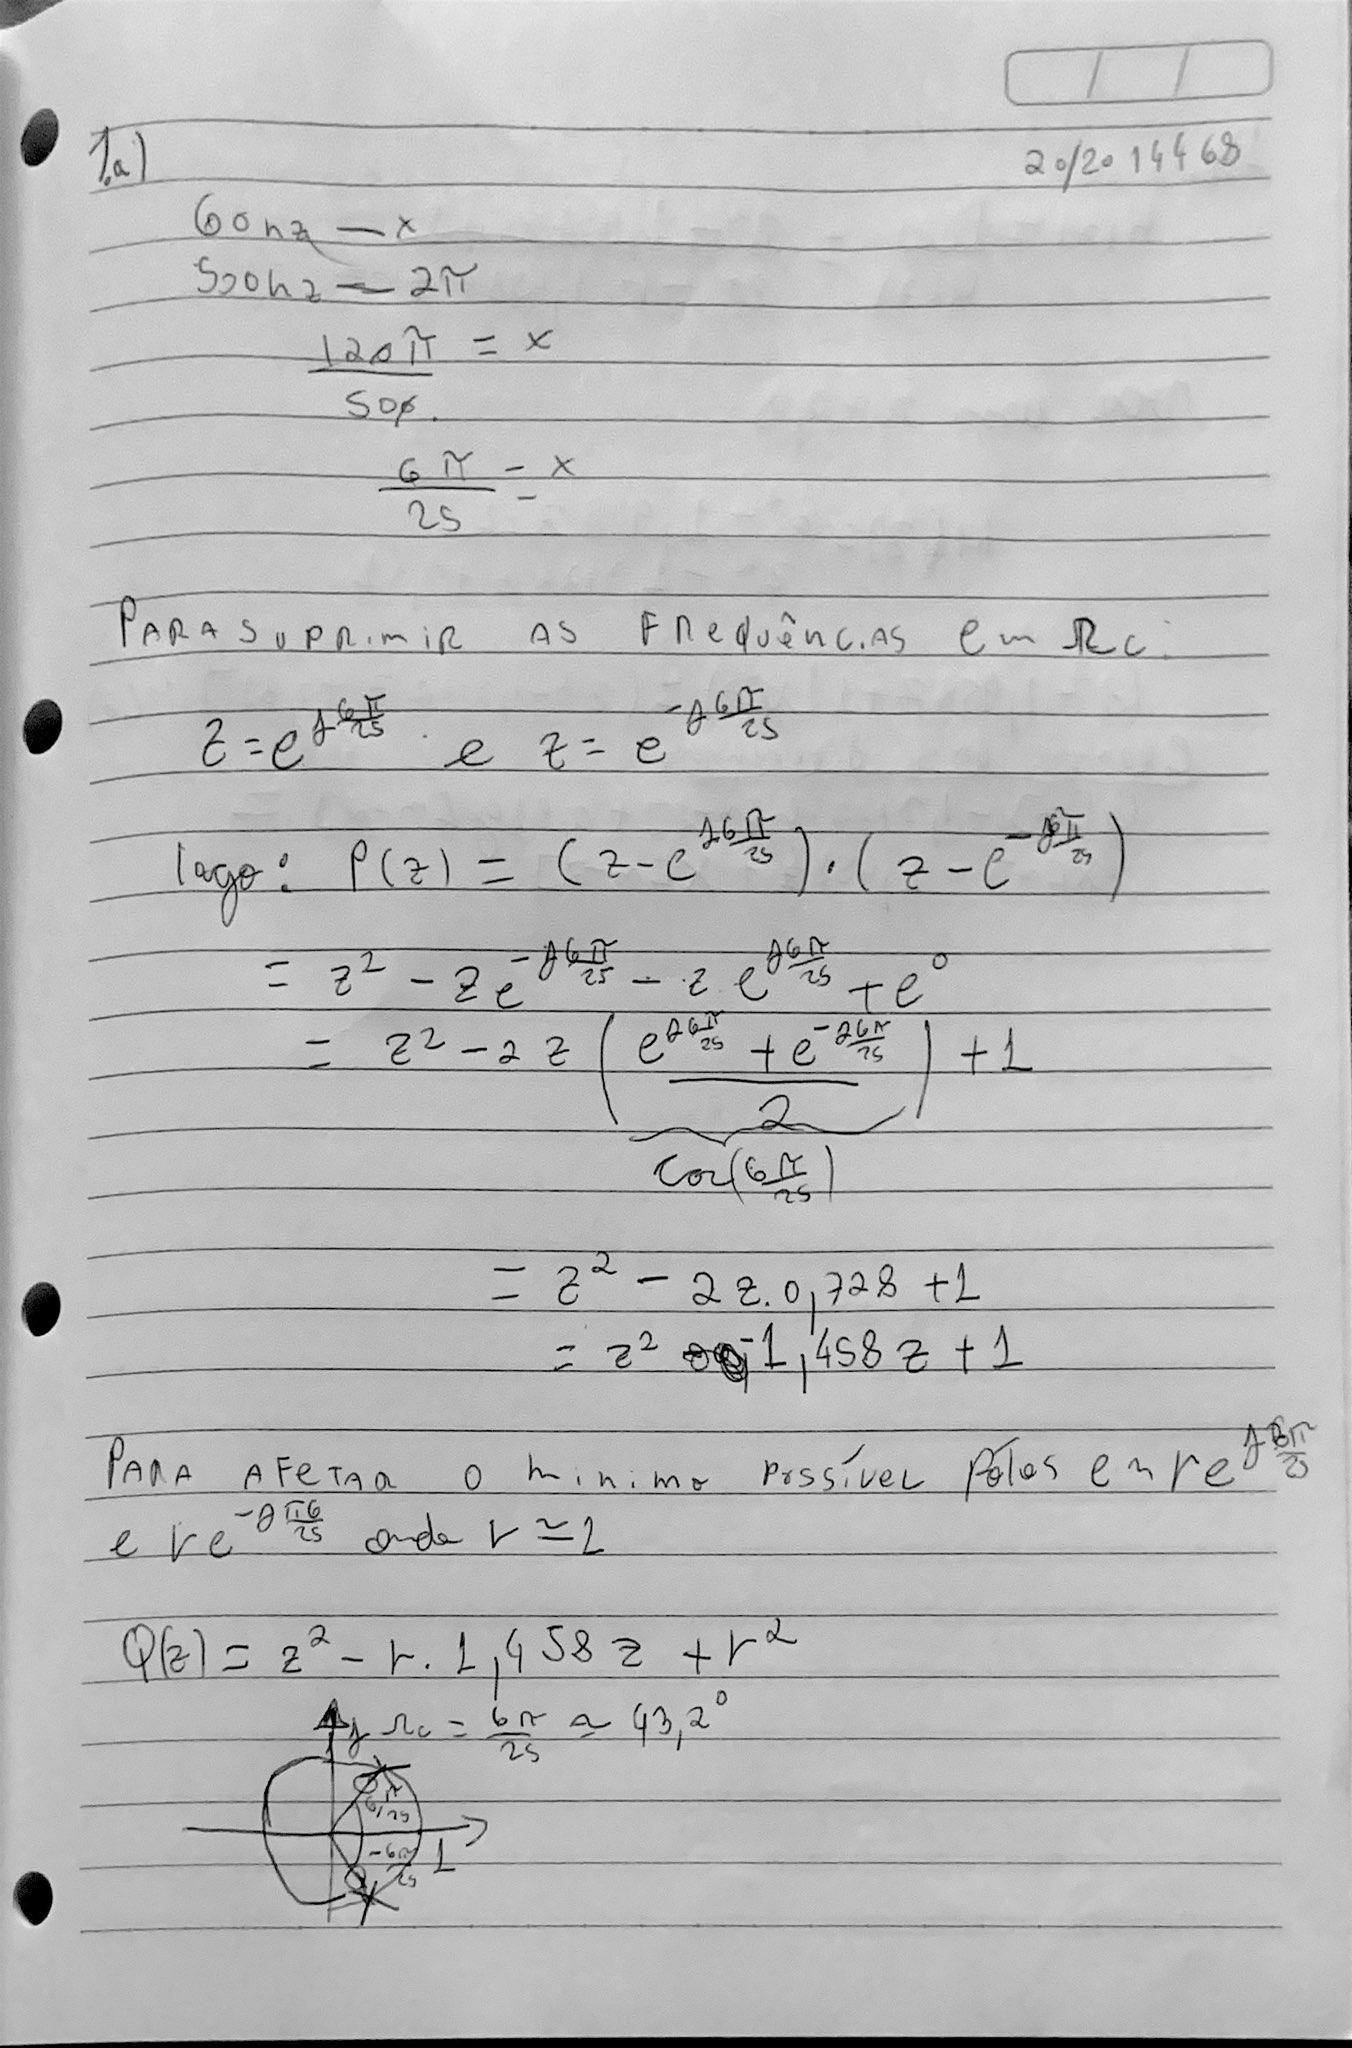

In [2]:
#Resposta da questão 1a
Image(filename='1A.jpg')

## Questão 1b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

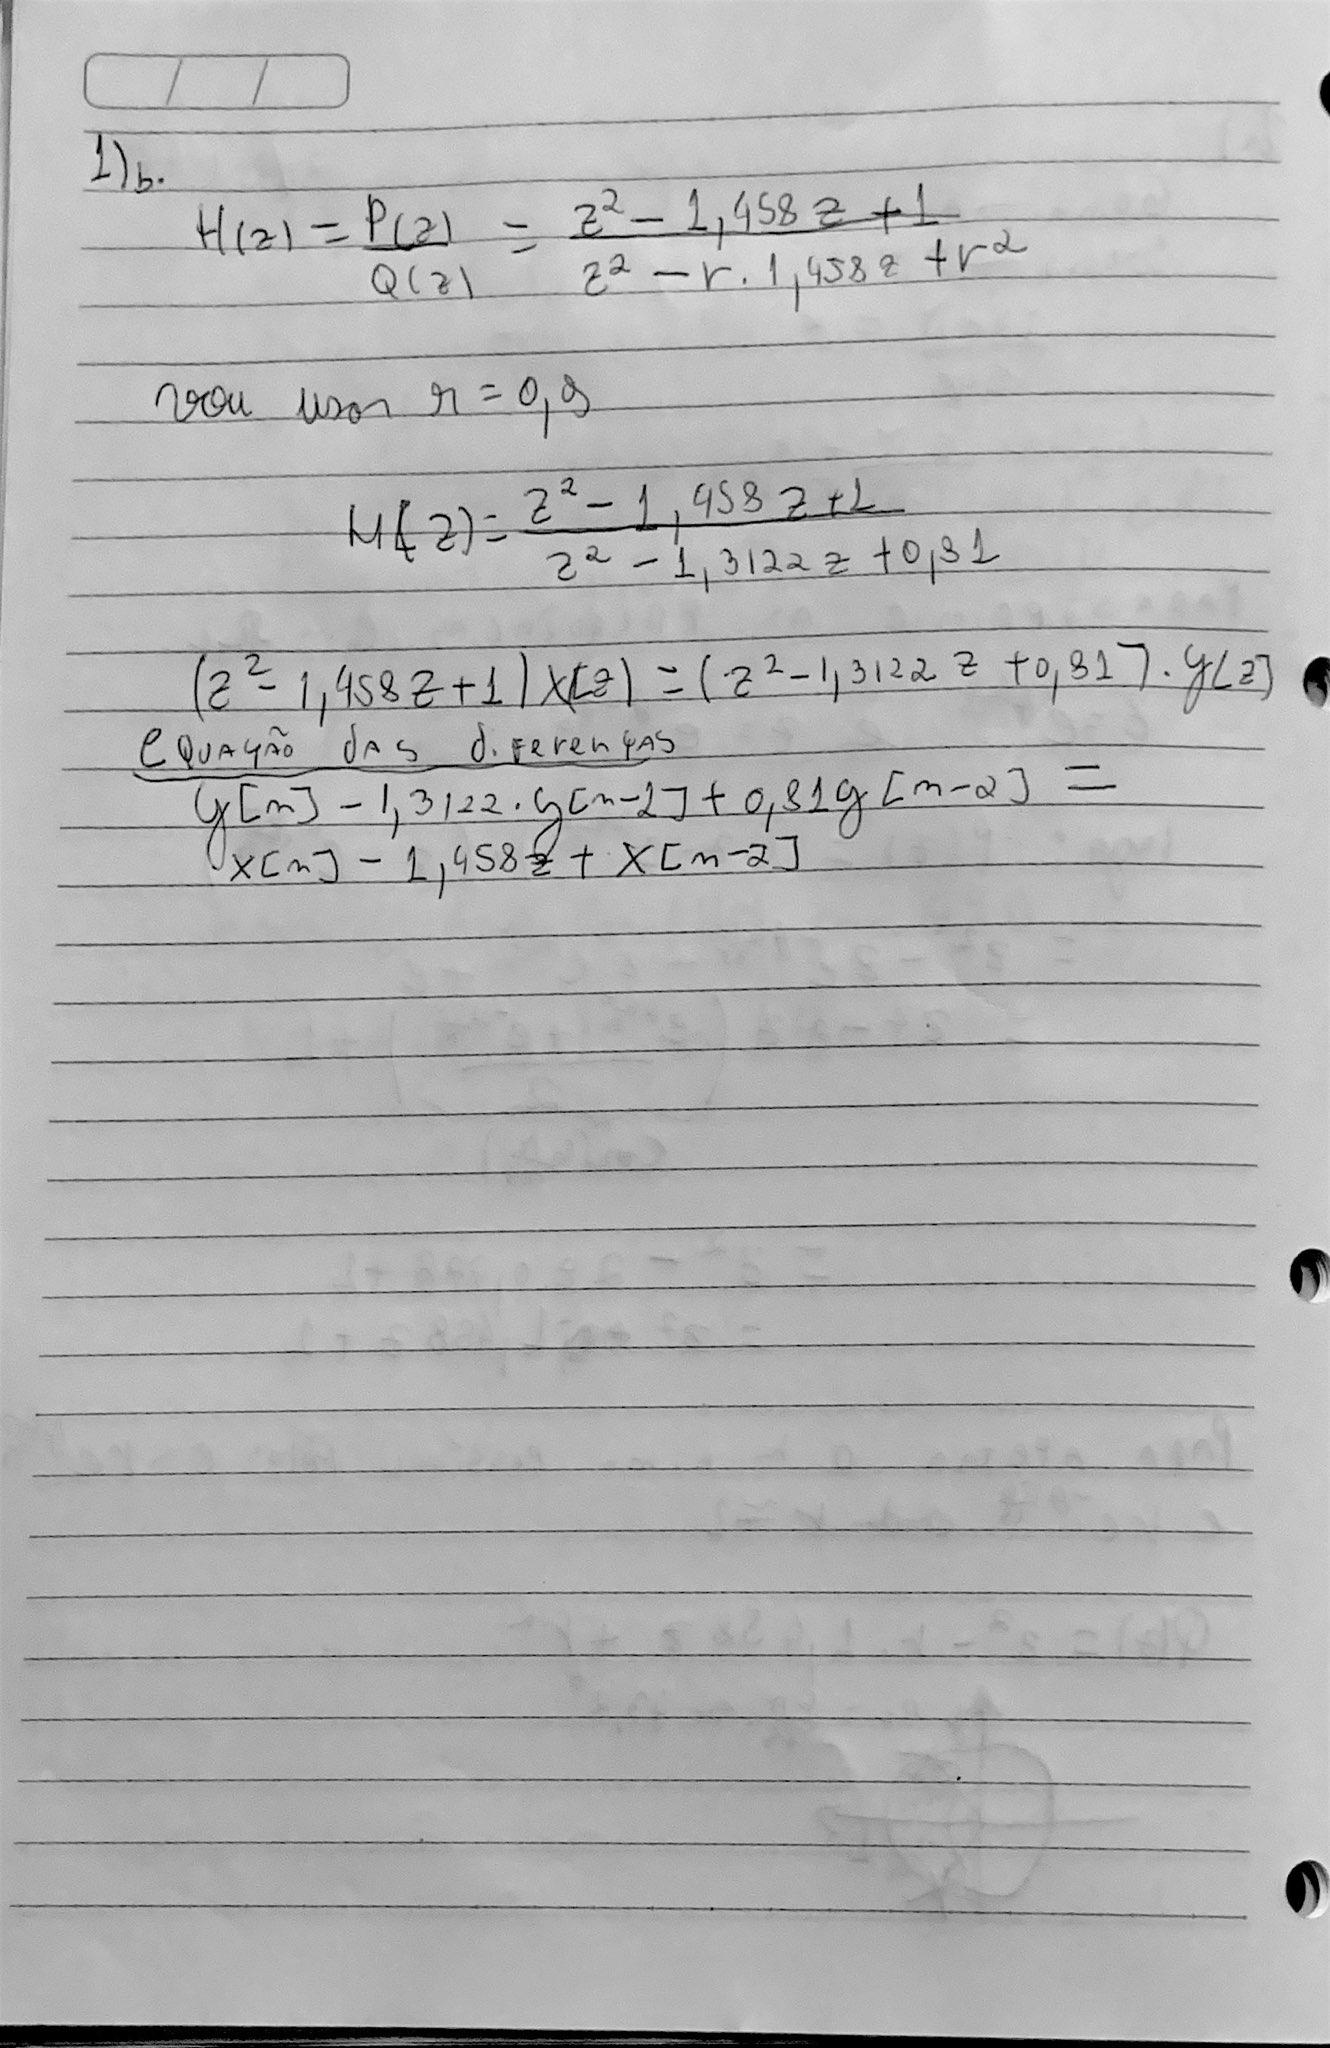

In [3]:

Image(filename='1B.jpg')

## Questão 1c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

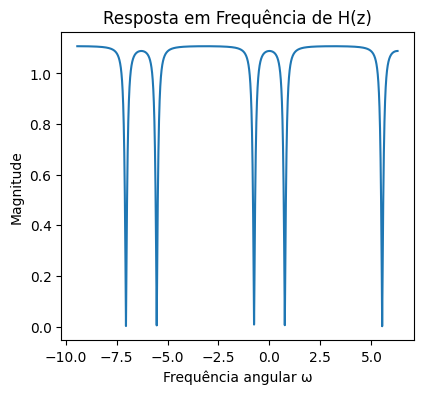

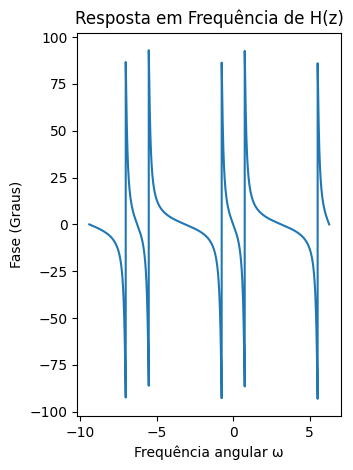

In [4]:
#Resposta da questão 1c
b0 = 1
b1 = -1.458
b2 = 1
a0 = 1
a1 = -1.3122
a2 = 0.81

w = np.linspace(-3 *np.pi, 2 * np.pi, 10000)
z = np.exp(1j * w)

H = (b0 * (z**2) + b1 * z + b2) / (a0 * (z**2) + a1 * z + a2)
H_abs = abs(H)
H_phase_deg = np.angle(H, deg=True)

plt.figure(figsize=(10, 4))
# em magnitude
plt.subplot(1, 2, 1)
plt.plot(w, H_abs)
plt.title('Resposta em Frequência de H(z)')
plt.xlabel('Frequência angular ω')
plt.ylabel('Magnitude')
plt.show()
# em fase
plt.subplot(1, 2, 2)
plt.plot(w, H_phase_deg)
plt.title('Resposta em Frequência de H(z)')
plt.xlabel('Frequência angular ω')
plt.ylabel('Fase (Graus)')

plt.tight_layout()
plt.show()



## Questão 1d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

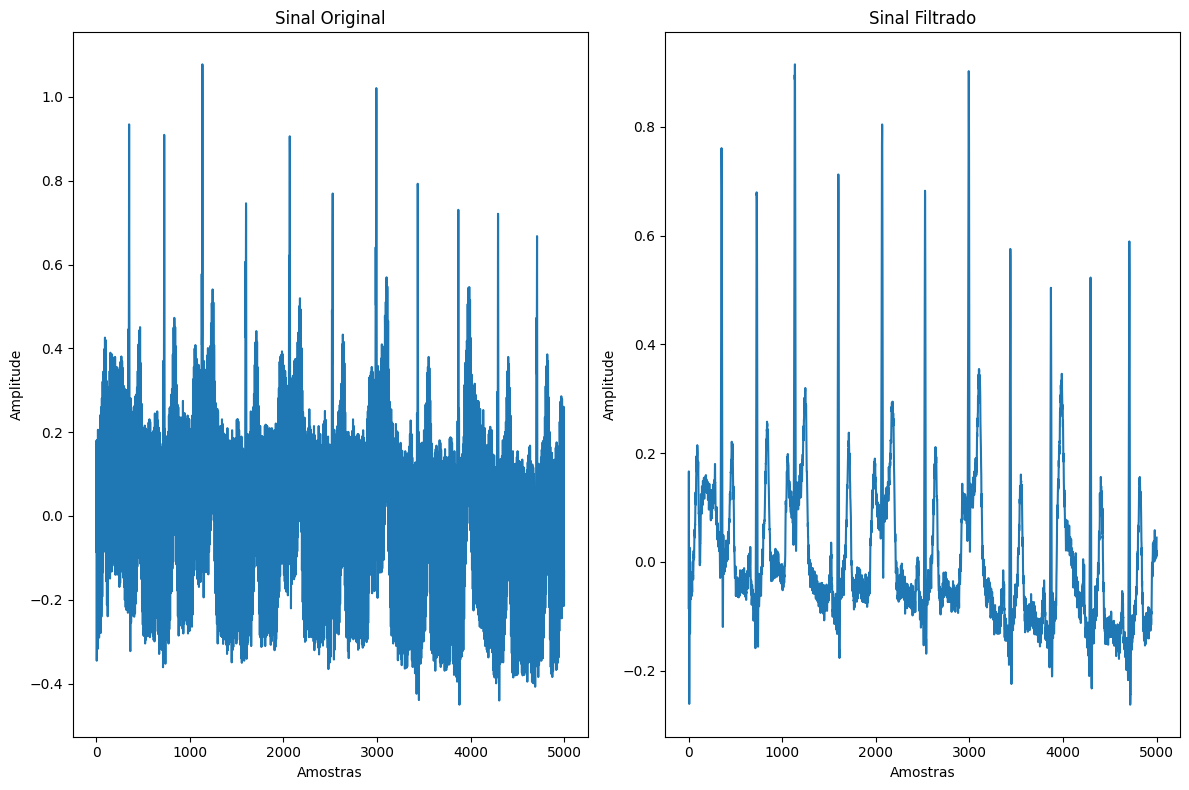

In [5]:
# Carregar o sinal de ECG
data = spio.loadmat('noisy_ecg_data.mat')
sinal = data['noisy_ecg'].ravel()

# Coeficientes do filtro
b0 = 1
b1 = -1.458
b2 = 1
a0 = 1
a1 = -1.3122
a2 = 0.81

# Aplicar o filtro ao sinal
filtered_signal = np.zeros_like(sinal)

for n in range(len(sinal)):
    if n >= 2:
        filtered_signal[n] = b0*sinal[n] + b1*sinal[n-1] + b2*sinal[n-2] - a1*filtered_signal[n-1] - a2*filtered_signal[n-2]
    elif n == 1:
        filtered_signal[n] = b0*sinal[n] + b1*sinal[n-1] - a1*filtered_signal[n-1]
    else:
        filtered_signal[n] = b0*sinal[n]

# Plotar o sinal original e o sinal filtrado
plt.figure(figsize=(12, 8))

# Sinal original
plt.subplot(1, 2, 1)
plt.plot(sinal)
plt.title('Sinal Original')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

# Sinal filtrado
plt.subplot(1, 2, 2)
plt.plot(filtered_signal)
plt.title('Sinal Filtrado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Questão 2

Ainda no sistema de aquisição de dados de eletrocardiograma, mais tarde foi verificado que, mesmo depois de resolvido o problema da interferência da rede elétrica (i.e., o sinal não tem um ruído específico em 60Hz), o sinal adquirido tinha bastante ruído de alta frequência (acima de 35Hz). O objetivo desta questão é projetar um filtro digital para atenuar as frequências acima de 35Hz. A frequêencia de amostragem do sistema é:

$$ f_a = 500~Hz $$

Siga as questões abaixo.

## Questão 2a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

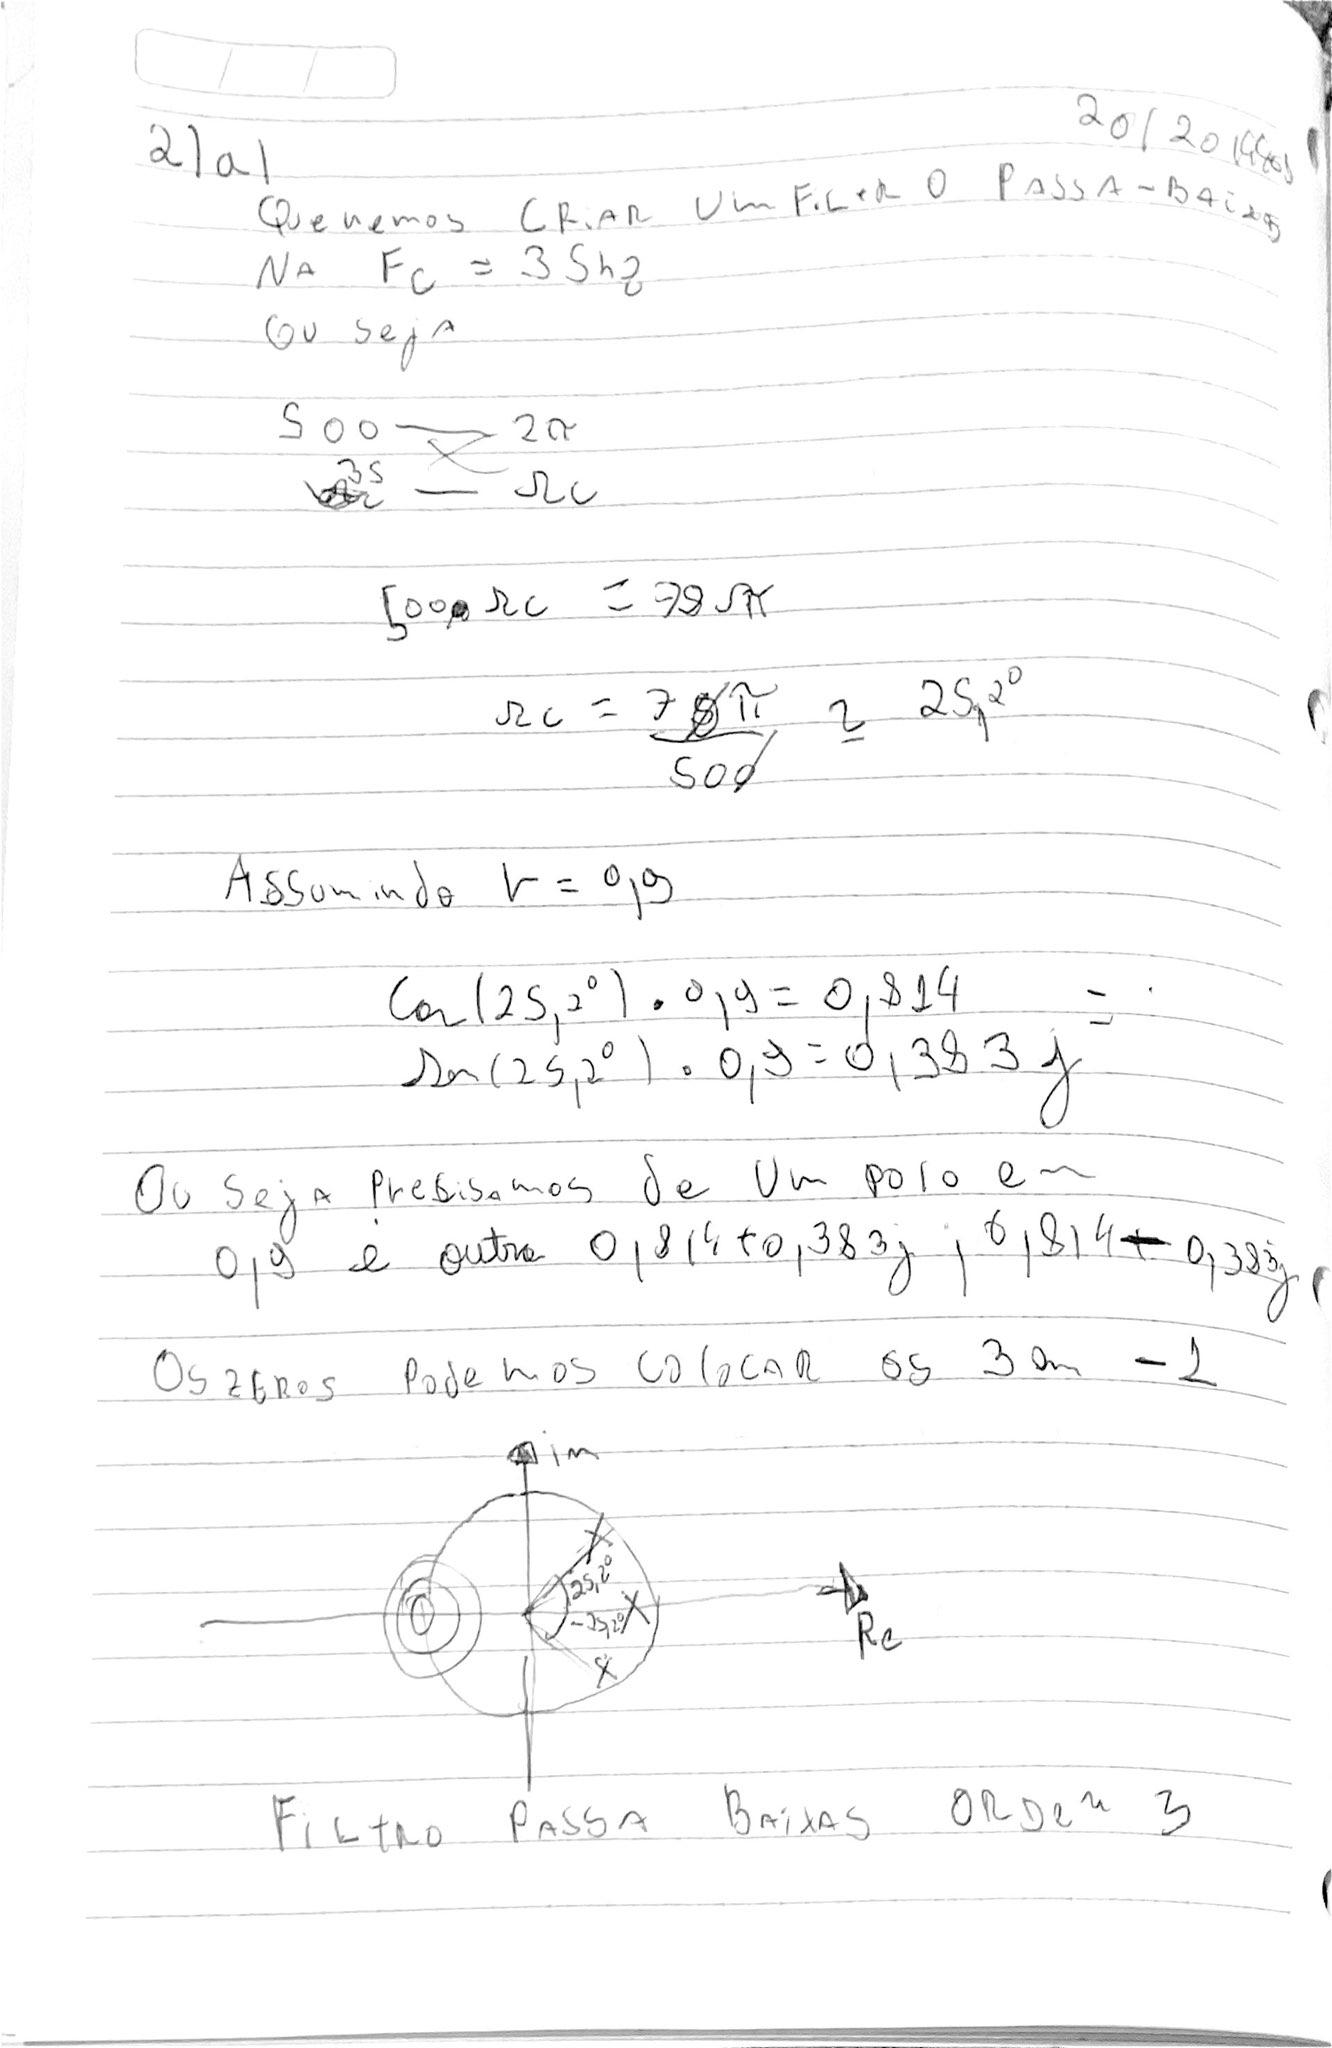

In [6]:
#Resposta da questão 2a
Image(filename='2P2A.jpg')

## Questão 2b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

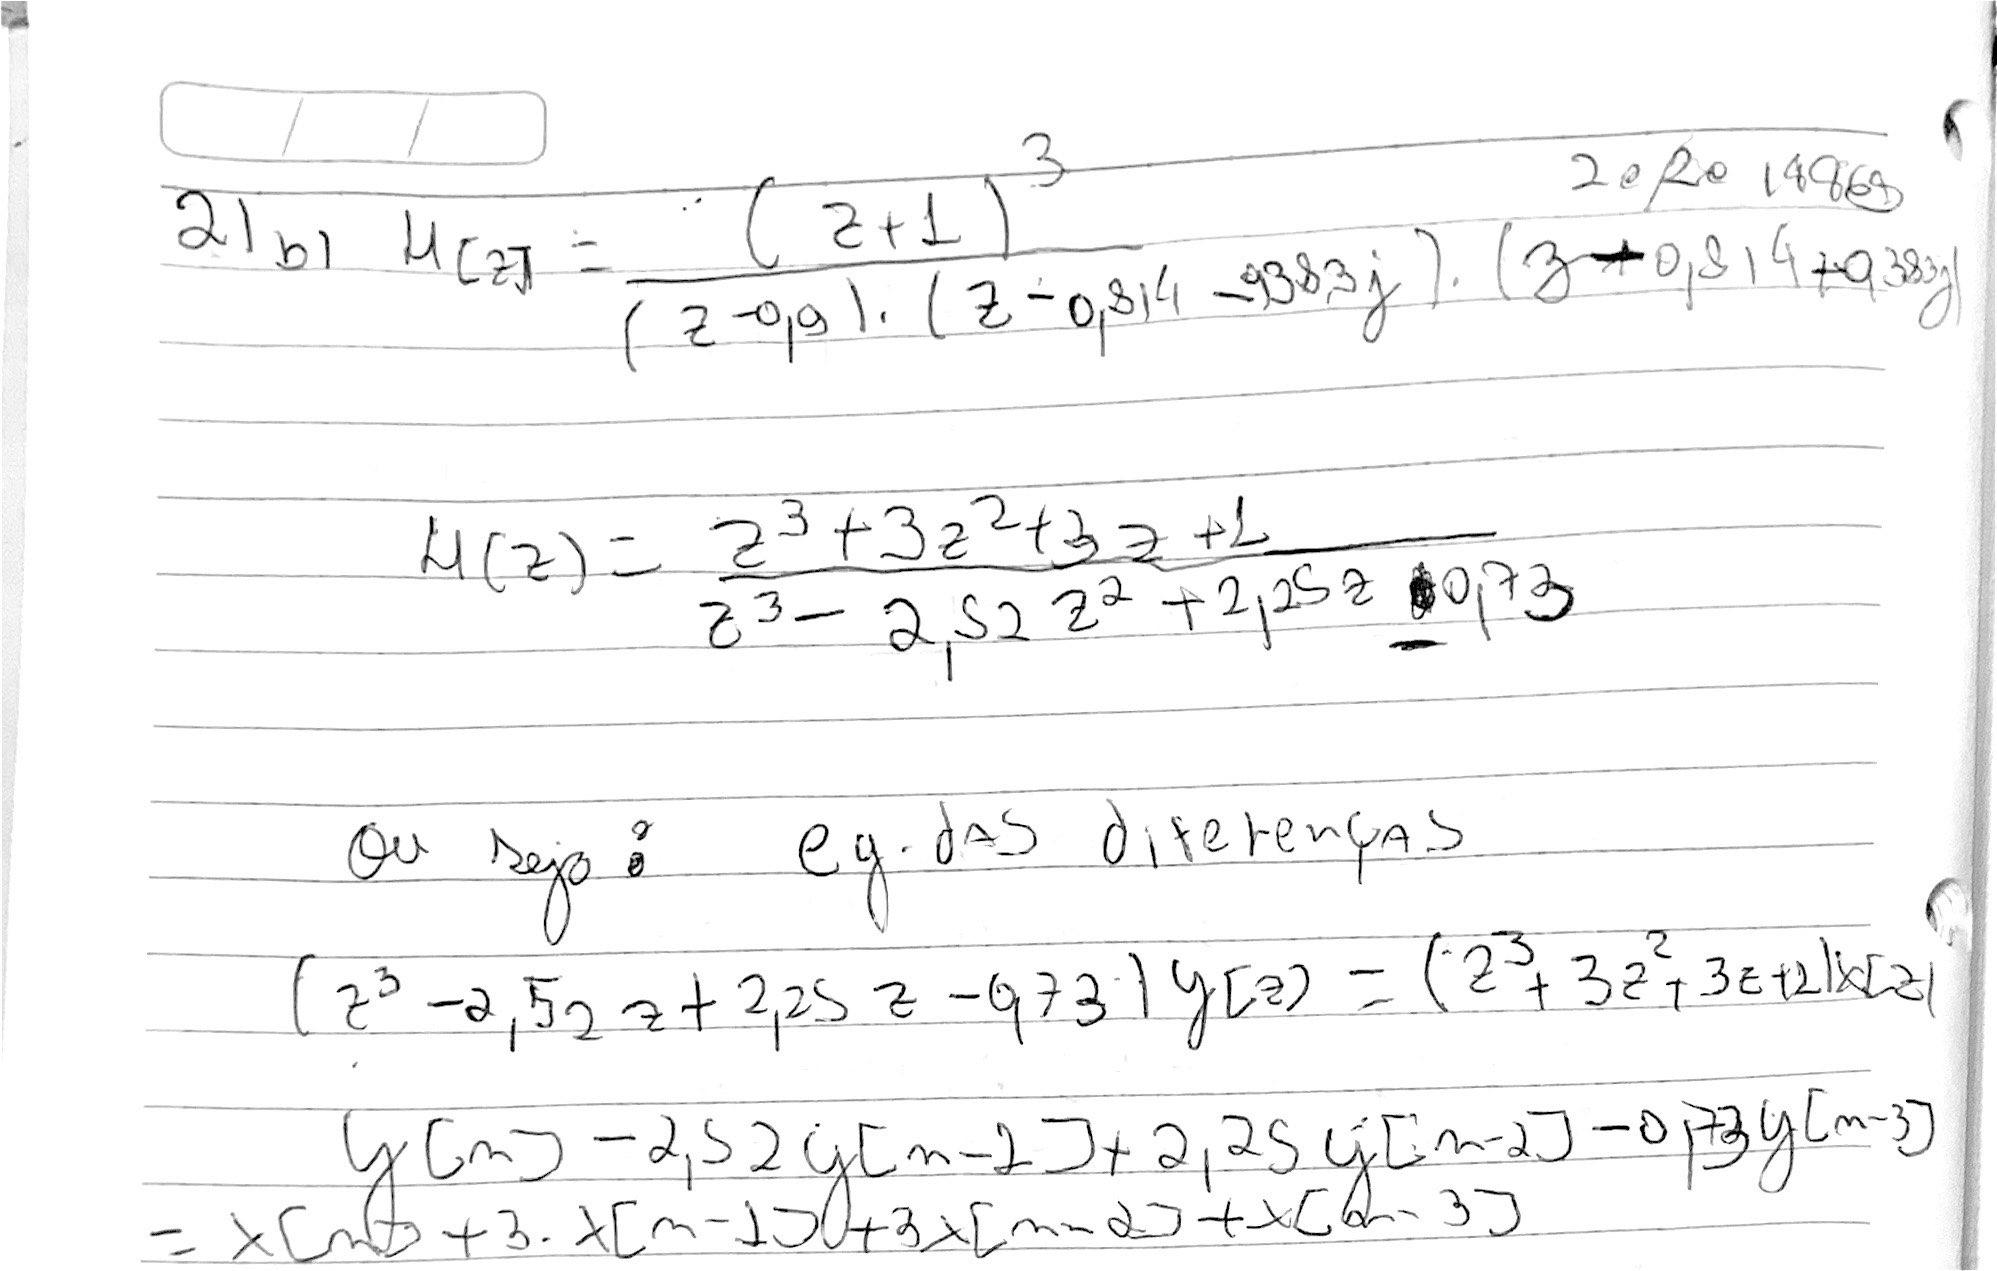

In [7]:
#Resposta da questão 2a
Image(filename='2P2B.jpg')

## Questão 2c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

Para realizar a resposta em frequência do filtro eu decidi fazer o código calculando e exibindo a resposta em frequência de um filtro passa-baixa projetado utilizando a técnica da janela de Hamming. A resposta em frequência é mostrada por meio da magnitude e da fase do filtro projetado. Isso permite visualizar como o filtro atenua as frequências acima da frequência de corte 35hz e preserva as frequências abaixo dela.

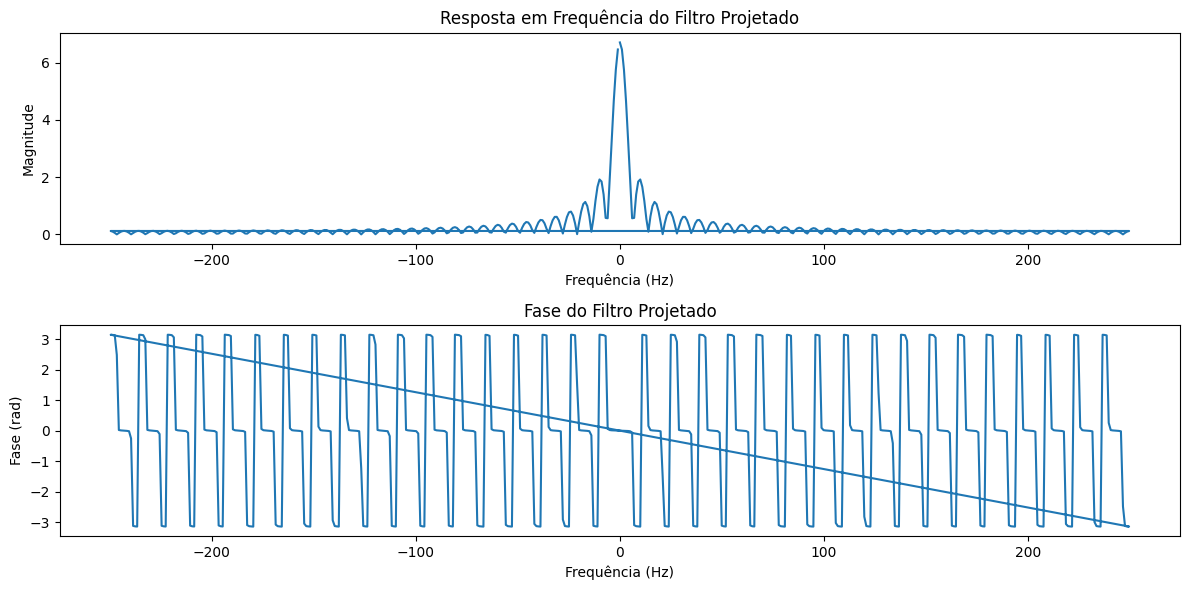

In [14]:
# Frequência de amostragem
fs = 500

# Frequência de corte
fc = 35

# Número de pontos do filtro
num_points = 501

# Cálculo do atraso do filtro
delay = (num_points - 1) // 2

# Criação da janela de Hamming
window = np.hamming(num_points)

# Criação do vetor de frequências
freq = np.fft.fftfreq(num_points, d=1/fs)

# Filtro ideal no domínio da frequência
ideal_filter = np.where(np.abs(freq) <= fc, 1, 0)

# Filtro projetado (multiplicação da janela pela resposta ideal)
filter_response = ideal_filter * window

# Transformada de Fourier inversa para obter a resposta ao impulso do filtro
impulse_response = np.fft.ifft(filter_response)

# Cálculo da resposta em frequência (magnitude e fase)
frequency_response = np.fft.fft(filter_response)

# Plot da resposta em frequência do filtro projetado (magnitude e fase)
plt.figure(figsize=(12, 6))

# Magnitude
plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(frequency_response))
plt.title('Resposta em Frequência do Filtro Projetado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Fase
plt.subplot(2, 1, 2)
plt.plot(freq, np.angle(frequency_response))
plt.title('Fase do Filtro Projetado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (rad)')

plt.tight_layout()
plt.show()

## Questão 2d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data_2.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

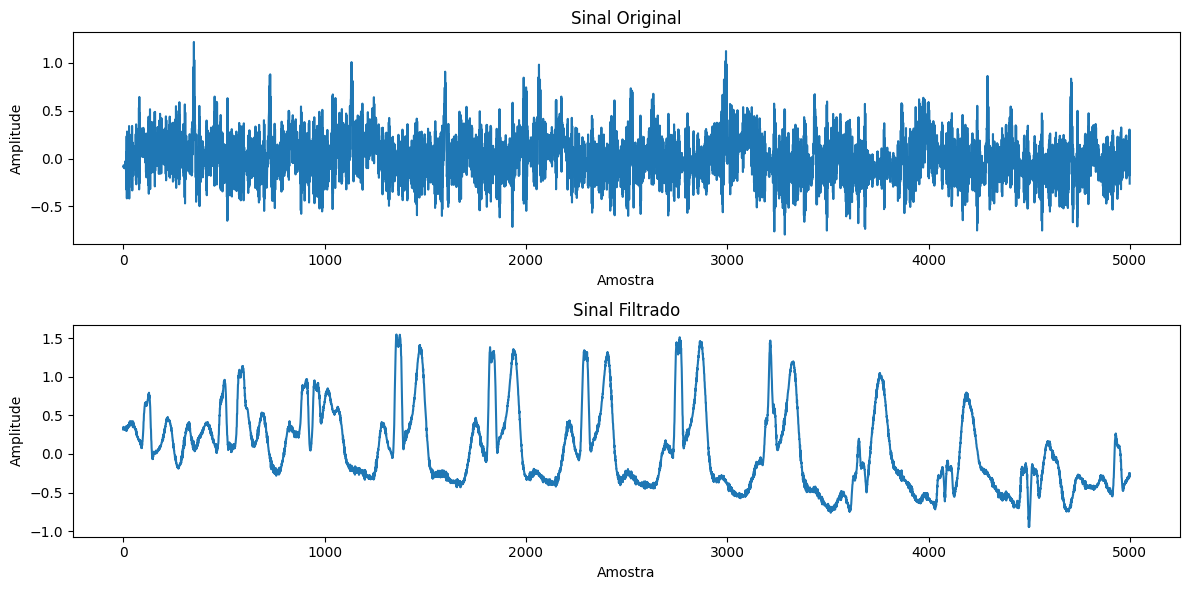

In [9]:
# Carregar o sinal do arquivo .mat
data = spio.loadmat('noisy_ecg_data_2.mat', squeeze_me=True)
sinal = data['noisy_ecg2']

# Frequência de amostragem
fs = 500

# Frequência de corte
fc = 35

# Número de pontos do filtro
num_points = 501

# Cálculo do atraso do filtro
delay = (num_points - 1) // 2

# Criação da janela de Hamming
window = np.hamming(num_points)

# Criação do vetor de frequências
freq = np.fft.fftfreq(num_points, d=1/fs)

# Filtro ideal no domínio da frequência
ideal_filter = np.where(np.abs(freq) <= fc, 1, 0)

# Filtro projetado (multiplicação da janela pela resposta ideal)
filter_response = ideal_filter * window

# Aplicação do filtro no sinal
filtered_signal = np.convolve(sinal, filter_response, mode='same')

# Plot do sinal antes e depois da filtragem
plt.figure(figsize=(12, 6))

# Sinal original
plt.subplot(2, 1, 1)
plt.plot(sinal)
plt.title('Sinal Original')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')

# Sinal filtrado
plt.subplot(2, 1, 2)
plt.plot(filtered_signal)
plt.title('Sinal Filtrado')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Questão 3

Considere o filtro analógico:

$$ H_a \left(s\right) = \frac{\omega_c}{\omega_c + s}$$

E considere o valor:

$$\omega_c = 10^3 $$

## Questão 3a (1  ponto)

Projete uma aproximação digital para este filtro com critério de 10%. Indique a taxa de amostragem calculada para esta aproximação (T1) e compare a resposta em frequência do filtro projetado H1() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

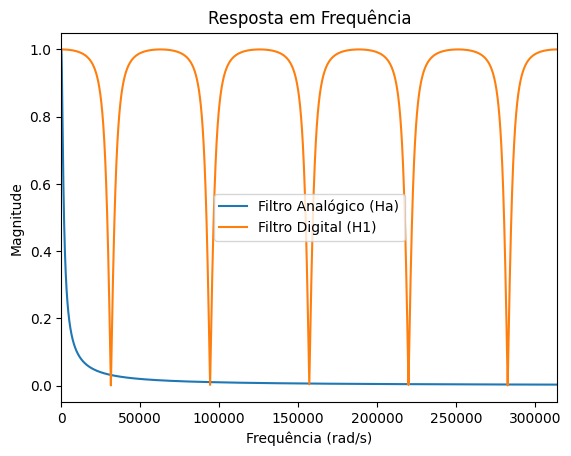

Taxa de amostragem T1: 0.01


In [10]:
# Frequência de corte do filtro analógico
wc = 1e3

# Critério de aproximação (10%)
eps = 0.1

# Taxa de amostragem para a aproximação digital
T1 = 1 / (wc * eps)

# Frequências para o plot
w = np.linspace(0,1e5 * np.pi, 10000)

# Resposta em frequência do filtro analógico
Ha = 1 / (1 + 1j * w / wc)

# Filtro digital
b, a = signal.bilinear([1], [1 / wc, 1], fs=1 / T1)

# Resposta em frequência do filtro digital
w_d, H1 = signal.freqz(b, a, worN=w)

# Plot das respostas em frequência
plt.plot(w, abs(Ha), label='Filtro Analógico (Ha)')
plt.plot(w, abs(H1), label='Filtro Digital (H1)')
plt.title('Resposta em Frequência')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude')
plt.xlim(0, 1e5 * np.pi)  # Limitando o eixo x até 𝜔 = 10^5 * pi
#plt.xlim(0, 58000)  # Limitando o eixo x até 𝜔 = 10^5 * pi

plt.legend()
plt.show()

# Print da taxa de amostragem T1
print('Taxa de amostragem T1:', T1)

## Questão 3b (1  ponto)

Projete uma aproximação digital para este filtro com critério de 1%. Indique a taxa de amostragem calculada para esta aproximação (T2) e compare a resposta em frequência do filtro projetado H2() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

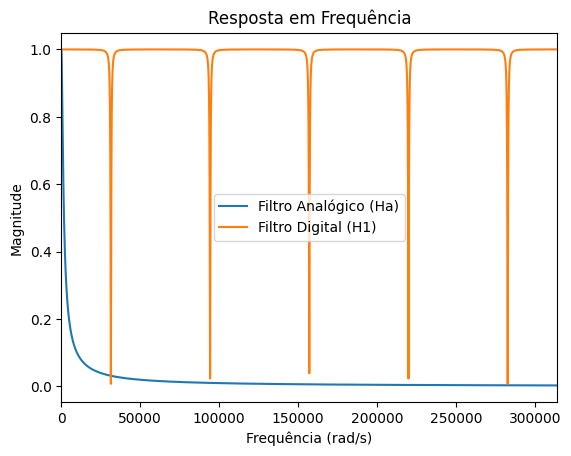

Taxa de amostragem T2: 0.1


In [11]:
# Frequência de corte do filtro analógico
wc = 1e3

# Critério de aproximação (1%)
eps = 0.01

# Taxa de amostragem para a aproximação digital
T2 = 1 / (wc * eps)

# Frequências para o plot
w = np.linspace(0, 1e5 * np.pi, 10000)

# Resposta em frequência do filtro analógico
Ha = 1 / (1 + 1j * w / wc)

# Filtro digital
b, a = signal.bilinear([1], [1 / wc, 1], fs=1 / T2)

# Resposta em frequência do filtro digital
w_d, H1 = signal.freqz(b, a, worN=w)

# Plot das respostas em frequência
plt.plot(w, abs(Ha), label='Filtro Analógico (Ha)')
plt.plot(w, abs(H1), label='Filtro Digital (H1)')
plt.title('Resposta em Frequência')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude')
plt.xlim(0, 1e5 * np.pi)  # Limitando o eixo x até 𝜔 = 10^5 * pi
plt.legend()
plt.show()

# Print da taxa de amostragem T1
print('Taxa de amostragem T2:', T2)

## Questão 3c (1 ponto)

Calcule a resposta ao impulso ha(t) do filtro analógico Ha(s), bem como as respostas ao impulso h1[n] e h2[n] dos filtros projetados H1(z) e H2(z). **Plote** as respostas ao impulso na mesma escala.

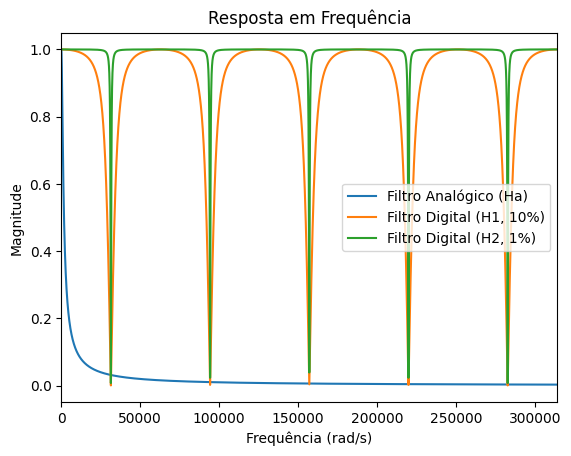

Taxa de amostragem T1 (10%): 0.01
Taxa de amostragem T2 (1%): 0.1


In [12]:


# Frequência de corte do filtro analógico
wc = 1e3

# Critério de aproximação (10%)
eps1 = 0.1

# Taxa de amostragem para a aproximação digital (10%)
T1 = 1 / (wc * eps1)

# Frequências para o plot
w = np.linspace(0, 1e5 * np.pi, 10000)

# Resposta em frequência do filtro analógico
Ha1 = 1 / (1 + 1j * w / wc)

# Filtro digital com critério de aproximação de 10%
b1, a1 = signal.bilinear([1], [1 / wc, 1], fs=1 / T1)

# Resposta em frequência do filtro digital com critério de aproximação de 10%
w_d1, H1 = signal.freqz(b1, a1, worN=w)

# Plot das respostas em frequência com critério de aproximação de 10%
plt.plot(w, abs(Ha1), label='Filtro Analógico (Ha)')
plt.plot(w, abs(H1), label='Filtro Digital (H1, 10%)')

# Critério de aproximação (1%)
eps2 = 0.01

# Taxa de amostragem para a aproximação digital (1%)
T2 = 1 / (wc * eps2)

# Filtro digital com critério de aproximação de 1%
b2, a2 = signal.bilinear([1], [1 / wc, 1], fs=1 / T2)

# Resposta em frequência do filtro digital com critério de aproximação de 1%
w_d2, H2 = signal.freqz(b2, a2, worN=w)

# Plot das respostas em frequência com critério de aproximação de 1%
plt.plot(w, abs(H2), label='Filtro Digital (H2, 1%)')

plt.title('Resposta em Frequência')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Magnitude')
plt.xlim(0, 1e5 * np.pi)  # Limitando o eixo x até 𝜔 = 10^5 * pi
plt.legend()
plt.show()

# Print das taxas de amostragem T1 e T2
print('Taxa de amostragem T1 (10%):', T1)
print('Taxa de amostragem T2 (1%):', T2)


## Questão 3d (2 pontos)

Considere o sinal:
$$ x\left(t\right) = e^{- \lambda t} u\left(t\right)$$

com

$$\lambda = 500 $$

Calcule a resposta teórica do filtro analógico, y(t), bem como a resposta do filtro digital H1(z) ao sinal amostrado com taxa T1 (x1[n]) e a resposta do filtro digital H2(z) ao sinal amostrado com taxa T2 (x2[n]). **Plote**, na mesma escala, o sinal y(t) e as aproximações y1[n] e y2[n]. 

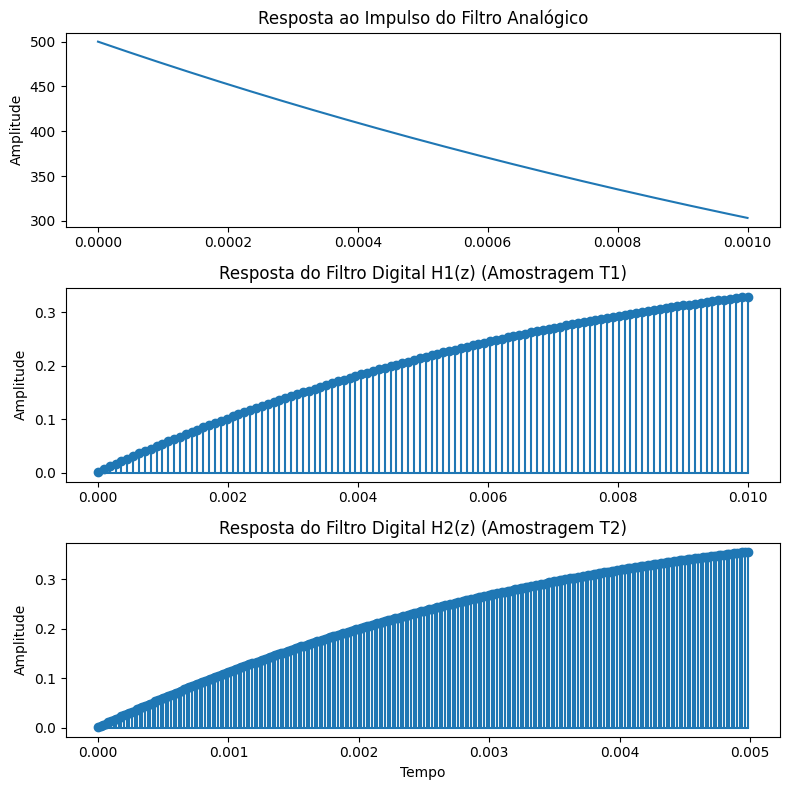

In [13]:

# Parâmetros do sinal e dos filtros
lambda_val = 500
T1 = 1e-5
T2 = 5e-6  # Valor ajustado para evitar divisão por zero

# Função de transferência do filtro analógico
def transfer_function_analog(s):
    return 1 / (1 + s)

# Função de transferência do filtro digital H1(z)
b1, a1 = signal.bilinear([1], [1 / lambda_val, 1], fs=1 / T1)

# Função de transferência do filtro digital H2(z)
b2, a2 = signal.bilinear([1], [1 / lambda_val, 1], fs=1 / T2)

# Resposta ao impulso do filtro analógico
t = np.linspace(0, 1e-3, 1000)  # Intervalo de tempo para a resposta ao impulso
h_analog = signal.impulse(([1], [1 / lambda_val, 1]), T=t)[1]

# Sinal de entrada x(t)
x = np.exp(-lambda_val * t) * (t >= 0)

# Sinais discretizados x1[n] e x2[n]
n1 = np.arange(0, len(x), int(T1 / t[1]))
n2 = np.arange(0, len(x), int(T2 / t[1]))
x1 = x[n1]
x2 = x[n2]

# Respostas dos filtros digitais
y1 = signal.lfilter(b1, a1, x1)
y2 = signal.lfilter(b2, a2, x2)

# Plot dos resultados
plt.figure(figsize=(8, 8))
plt.subplot(311)
plt.plot(t, h_analog)
plt.ylabel('Amplitude')
plt.title('Resposta ao Impulso do Filtro Analógico')

plt.subplot(312)
plt.stem(n1 * T1, y1, linefmt='C0', markerfmt='C0o', basefmt='C0')
plt.ylabel('Amplitude')
plt.title('Resposta do Filtro Digital H1(z) (Amostragem T1)')

plt.subplot(313)
plt.stem(n2 * T2, y2, linefmt='C0', markerfmt='C0o', basefmt='C0')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Resposta do Filtro Digital H2(z) (Amostragem T2)')

plt.tight_layout()
plt.show()
